In [1]:
import sys
sys.path.insert(0, '../util')
sys.path.insert(0, '../')
import matplotlib.pyplot as plt
from sc import *
from plot import *
from tqdm import tqdm
from alg import hstar, k_rollout, bhattacharya, almost_equal
from pqdict import pqdict
import numpy as np
from tqdm import tqdm
from multiprocessing import Pool, cpu_count

In [3]:
colors = ['#4daf4a', '#984ea3', '#f781bf', '#ff7f00', '#377eb8', '#ff7f00', '#a65628', '#999999', '#e41a1c', '#dede00']

def get_hole_coords(n_side, row_col_coords):
    delta = 2 / (n_side - 1)
    return np.array([np.array(x) * delta - (1, 1) for x in row_col_coords])

n_side = 9
SC = SimplicialComplex(n_side, False, False, True)

node_coords = [(2, 3), (n_side - 3, n_side-4)]
hole_locs = get_hole_coords(n_side, node_coords)
dx = 1 / (n_side - 1)
SC.make_holes(hole_locs, dx)

In [56]:
loop = [(-1, 0), (0, 0), (0, -0.6), (-1, -1)]
path = [(-1, -1)] + loop * 1 + [(-1, 0), (1, 0), (1,1)]

<AxesSubplot:>

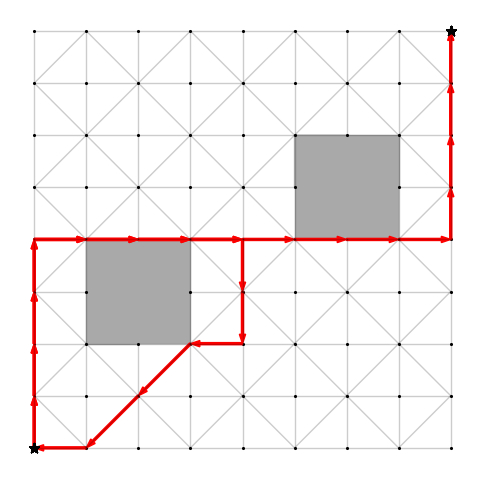

In [57]:
ref_path = path_from_coords(SC, path)
plot_path(SC, ref_path, 'red', None, None)

<AxesSubplot:>

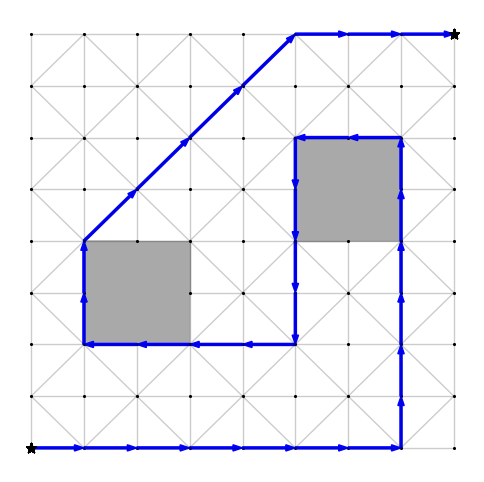

In [58]:
path2 = path_from_coords(SC, [(-1, -1), (0.7, -1), (0.6, 0.6), (0.2,0.6), (0.2, -0.6), (-0.6,-0.6), (-0.7,0), (0.6,1), (1,1)])
plot_path(SC, path2, 'blue', None, None)

In [59]:
res, others = bhattacharya(SC, ref_path, others=True)

In [60]:
len(others)

10

In [61]:
best_paths = []
alphas = np.linspace(0, 1, 10)
candidates = others+[res]

for alpha in alphas:
    path_costs = [path.cost(ref_path.proj, alpha) for path in candidates]
    best_idx = np.argmin(path_costs)
    best_paths.append(candidates[best_idx])

best_best_paths = []
trans_alphas = [0]
for path_i in best_paths:
    dont_add = False
    for path_j in best_best_paths[::-1]:
        if path_i.proj_diff(path_j) < 1e-10:
            dont_add = True
            break
    if not dont_add:
        best_best_paths.append(path_i)
        
best_paths = best_best_paths

<AxesSubplot:>

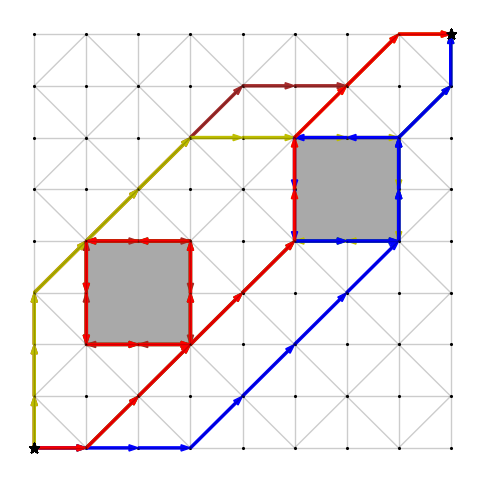

In [62]:
# for i, path in enumerate(best_paths):
#     several_path_plot(SC, [ref_path, path], colors = [colors[4], colors[i]])
colors = ['r', 'b', 'g', 'y', 'brown'][::-1]
several_path_plot(SC, ([ref_path]+others)[::-1], None, None, colors)

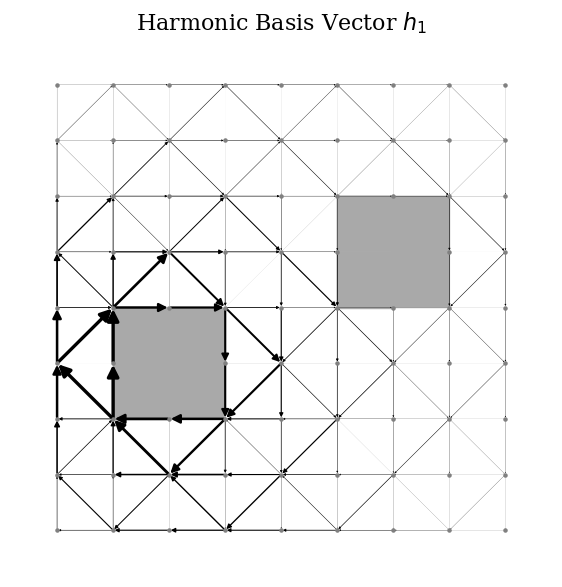

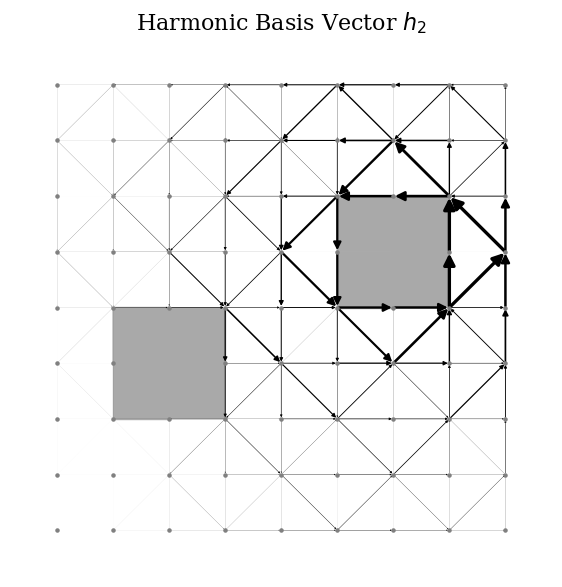

In [63]:
plot_bases(SC, figsize=(7,7), edge_color='k')

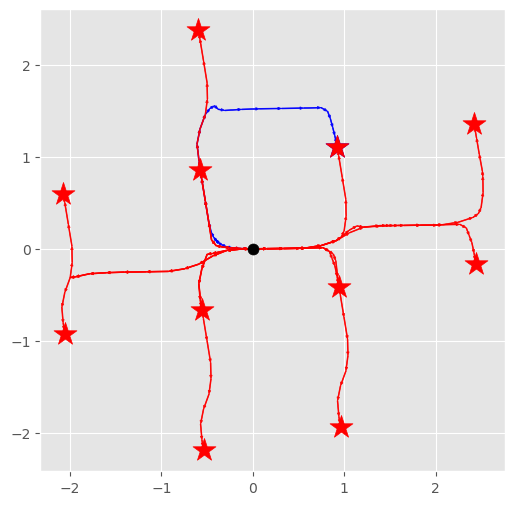

In [64]:
# colors = ['r', 'b', 'g', 'y', 'brown']
colors = ['r', 'b'] + ['r']*100
plot_projections([ref_path, path2]+others, colors)

In [65]:
# lattice?